# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam.isnull().sum() 

v1    0
v2    0
dtype: int64

In [6]:
spam.drop_duplicates(subset=['v2'], inplace=True)

In [7]:
spam.reset_index(drop=True, inplace=True)
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam['v1'] = spam['v1'].replace(['ham','spam'],[0,1])
spam.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Tokenizing


- 단어 토큰화

In [9]:
# word_tokenize
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to C:\Users\Kim Eun
[nltk_data]     ho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [10]:
# TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(spam.iloc[5]['v2'])

['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [11]:
# keras text_to_word_sequence (it's 의 ' 보존)
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(spam.iloc[5]['v2'])

['freemsg',
 'hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back',
 "i'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'å£1',
 '50',
 'to',
 'rcv']

- 문장 토큰화

In [12]:
from nltk.tokenize import sent_tokenize
sent_tokenize(spam.iloc[5]['v2'])

["FreeMsg Hey there darling it's been 3 week's now and no word back!",
 "I'd like some fun you up for it still?",
 'Tb ok!',
 'XxX std chgs to send, å£1.50 to rcv']

In [13]:
!pip install kss

In [14]:
import kss
kss.split_sentences(spam.iloc[5]['v2'])

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



["FreeMsg Hey there darling it's been 3 week's now and no word back!",
 "I'd like some fun you up for it still?",
 'Tb ok!',
 'XxX std chgs to send, å£1.50 to rcv']

해당 과제는 스팸 메세지 여부를 의미하는 라벨이 존재하므로<br> 그를 판단하기 위한 문장보다는 단어를 해석하는 것이 적절하다 판단 , word tokenizing 진행 <br>
Keras의 text_to_word_sequence 를 사용해 텍스트를 단어(토큰)의 시퀀스로 반환 (소문자로 변경, 특수문자 제거)

In [15]:
# 특수문자 제거
import re

def remove_special_symbols(data):
    text = re.sub('[^a-zA-Z]',' ', data).lower() #소문자로 변경 ( Keras에 중복 )
    return text

spam['v2'] = spam['v2'].apply(remove_special_symbols)

In [16]:
# 불용어 
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to C:\Users\Kim Eun
[nltk_data]     ho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df = spam.copy()
result = []
for row in df['v2']:
    tokenize = text_to_word_sequence(row)
    words = [word for word in tokenize if word not in stop_words] 
    result.append(words)

df.v2 = result
df.head()

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### CountVectorizer (BOW)

In [18]:
# ham
from sklearn.feature_extraction.text import CountVectorizer
corpus = sum(df[df['v1'] == 0]['v2'],[])
vector = CountVectorizer()
ct_ham = vector.fit_transform(corpus)
ct_ham = pd.DataFrame( {'word' : vector.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
ct_ham.sort_values('count', ascending = False).head(7)

,word,count
2249,get,301
2384,gt,288
3316,lt,287
3919,ok,255
2290,go,245
2326,got,227
3046,know,225


In [19]:
# spam
from sklearn.feature_extraction.text import CountVectorizer
corpus = sum(df[df['v1'] == 1]['v2'],[])
vector = CountVectorizer()
ct_spam = vector.fit_transform(corpus)
ct_spam = pd.DataFrame( {'word' : vector.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
ct_spam.sort_values('count', ascending = False).head(7)

,word,count
208,call,322
599,free,197
1749,txt,141
1788,ur,119
1573,stop,114
1008,mobile,111
1658,text,109


---

### TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus = sum(df[df['v1'] == 0]['v2'],[])
ct_ham = vector.fit_transform(corpus)
ct_ham = pd.DataFrame( {'word' : vector.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
ct_ham.sort_values('count', ascending = False).head(7)

,word,count
160,gt,288.0
245,lt,287.0
298,ok,255.0
155,got,227.0
212,know,225.0
229,like,222.0
153,good,215.0


In [21]:
vector = TfidfVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus = sum(df[df['v1'] == 1]['v2'],[])
ct_spam = vector.fit_transform(corpus)
ct_spam = pd.DataFrame( {'word' : vector.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
ct_spam.sort_values('count', ascending = False).head(7)

,word,count
144,free,197.0
437,txt,141.0
446,ur,119.0
396,stop,114.0
251,mobile,111.0
415,text,109.0
61,claim,96.0


---

### Word2Vec (Skip-gram)

In [22]:
!pip install glove -r


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

-r option requires 1 argument


In [23]:
from gensim.models import Word2Vec, FastText

# sg=1 : Skip gram
# spam
sg_spam = Word2Vec(df[df['v1'] == 1]['v2'], min_count=5, window=2,sg=1)

In [24]:
sg_spam.wv.most_similar("free")

[('text', 0.9982835650444031),
 ('txt', 0.9982496500015259),
 ('get', 0.9982311129570007),
 ('www', 0.9982141852378845),
 ('u', 0.9980274438858032),
 ('nokia', 0.9979892373085022),
 ('phone', 0.9979826807975769),
 ('ur', 0.997978150844574),
 ('msg', 0.9979550838470459),
 ('p', 0.9979373216629028)]

In [25]:
sg_spam.wv.most_similar("call")

[('claim', 0.9985518455505371),
 ('mobile', 0.9981852769851685),
 ('find', 0.9980739951133728),
 ('phone', 0.9980351328849792),
 ('www', 0.998024582862854),
 ('text', 0.9980076551437378),
 ('mins', 0.9979958534240723),
 ('c', 0.9979661703109741),
 ('u', 0.997947633266449),
 ('reply', 0.9979391098022461)]

In [26]:
sg_spam.wv.most_similar(positive=["free","txt"],negative=["ok"],topn=10)

[('x', 0.9900342226028442),
 ('yes', 0.9898269176483154),
 ('min', 0.989639401435852),
 ('new', 0.9895007014274597),
 ('real', 0.9894759058952332),
 ('back', 0.989210307598114),
 ('wkly', 0.9891347885131836),
 ('know', 0.9891195297241211),
 ('go', 0.9890960454940796),
 ('hl', 0.9890870451927185)]

In [27]:
# ham
sg_ham = Word2Vec(df[df['v1'] == 0]['v2'], min_count=5, window=2,sg=1)

In [28]:
sg_ham.wv.most_similar("get")

[('friend', 0.9985132217407227),
 ('hav', 0.9983342885971069),
 ('find', 0.9983221888542175),
 ('pick', 0.9983203411102295),
 ('still', 0.9983046054840088),
 ('wot', 0.9982882738113403),
 ('liao', 0.9982815384864807),
 ('times', 0.9982806444168091),
 ('never', 0.9982661008834839),
 ('today', 0.9982621669769287)]

In [29]:
sg_ham.wv.most_similar("ok")

[('wait', 0.9983475804328918),
 ('oso', 0.9983341097831726),
 ('missed', 0.9983178377151489),
 ('long', 0.9983112215995789),
 ('said', 0.9982349872589111),
 ('much', 0.998231053352356),
 ('mind', 0.9982259273529053),
 ('two', 0.9982170462608337),
 ('anyway', 0.9982137084007263),
 ('lar', 0.998149573802948)]

In [30]:
sg_ham.wv.most_similar(positive=["get","ok"],negative=["call"],topn=10)

[('anyway', 0.997413694858551),
 ('quite', 0.997384786605835),
 ('oso', 0.9971026182174683),
 ('still', 0.9970769286155701),
 ('long', 0.997053325176239),
 ('late', 0.9970449805259705),
 ('wot', 0.997035562992096),
 ('online', 0.9970133304595947),
 ('coming', 0.9970071315765381),
 ('sad', 0.9969900846481323)]

---

### Word2Vec (CBOW)

In [31]:
# sg=0 : CBOW
# spam
cbow_spam = Word2Vec(df[df['v1'] == 1]['v2'], min_count=5, window=2,sg=0)

In [32]:
cbow_spam.wv.most_similar("free")

[('call', 0.9926356673240662),
 ('txt', 0.9912704825401306),
 ('u', 0.9905443787574768),
 ('text', 0.9902729988098145),
 ('www', 0.9882624745368958),
 ('p', 0.9877394437789917),
 ('nokia', 0.9869906306266785),
 ('win', 0.986856997013092),
 ('stop', 0.9865471124649048),
 ('service', 0.9865317344665527)]

In [33]:
cbow_spam.wv.most_similar("call")

[('txt', 0.9938505291938782),
 ('free', 0.9926356077194214),
 ('text', 0.9926289319992065),
 ('u', 0.9922134280204773),
 ('claim', 0.9911670684814453),
 ('reply', 0.9910253882408142),
 ('mobile', 0.9909191727638245),
 ('www', 0.9908844232559204),
 ('stop', 0.9905855655670166),
 ('c', 0.9903985857963562)]

In [34]:
cbow_spam.wv.most_similar(positive=["free","txt"],negative=["ok"],topn=10)

[('yes', 0.8883588910102844),
 ('new', 0.8795026540756226),
 ('x', 0.8783974647521973),
 ('know', 0.8775373697280884),
 ('please', 0.8774534463882446),
 ('min', 0.8771234154701233),
 ('back', 0.876404345035553),
 ('pobox', 0.8761265277862549),
 ('sae', 0.8756853342056274),
 ('stop', 0.875016450881958)]

In [35]:
# ham
cbow_ham = Word2Vec(df[df['v1'] == 0]['v2'], min_count=5, window=2,sg=0)

In [36]:
cbow_ham.wv.most_similar("get")

[('u', 0.9995494484901428),
 ('like', 0.9994762539863586),
 ('still', 0.9994755983352661),
 ('much', 0.9994682669639587),
 ('go', 0.999459445476532),
 ('ur', 0.9994533658027649),
 ('today', 0.9994344711303711),
 ('got', 0.9994332790374756),
 ('day', 0.9994213581085205),
 ('home', 0.9994075298309326)]

In [37]:
cbow_ham.wv.most_similar("ok")

[('go', 0.9993622899055481),
 ('much', 0.9993136525154114),
 ('u', 0.9993122816085815),
 ('n', 0.999299943447113),
 ('said', 0.9992639422416687),
 ('got', 0.9992636442184448),
 ('call', 0.9992424249649048),
 ('get', 0.9992392063140869),
 ('need', 0.9992331266403198),
 ('ur', 0.999230682849884)]

In [38]:
cbow_ham.wv.most_similar(positive=["get","ok"],negative=["call"],topn=10)

[('ur', 0.9989633560180664),
 ('go', 0.9989348649978638),
 ('u', 0.9989314079284668),
 ('time', 0.9988807439804077),
 ('like', 0.9988727569580078),
 ('much', 0.9988716840744019),
 ('said', 0.998846173286438),
 ('today', 0.9988364577293396),
 ('going', 0.9988340735435486),
 ('home', 0.9988260269165039)]

---

### FastText

In [39]:
from gensim.models import FastText
# spam
fasttext_spam = FastText(df[df['v1'] == 1]['v2'], window=5, min_count=5, workers=4, sg=1)

In [40]:
fasttext_spam.wv.most_similar("free")

[('phones', 0.9998065233230591),
 ('mobile', 0.9997553825378418),
 ('phone', 0.9997530579566956),
 ('mobiles', 0.9997485280036926),
 ('mobileupd', 0.9997155666351318),
 ('freemsg', 0.9996920228004456),
 ('mob', 0.9996858239173889),
 ('motorola', 0.9996747970581055),
 ('latest', 0.9996594786643982),
 ('camera', 0.9996584057807922)]

In [41]:
fasttext_spam.wv.most_similar("call")

[('caller', 0.9998575448989868),
 ('calls', 0.9997669458389282),
 ('calling', 0.9996905326843262),
 ('guaranteed', 0.9996654987335205),
 ('awarded', 0.9996306300163269),
 ('rental', 0.9996192455291748),
 ('urgent', 0.9996144771575928),
 ('bonus', 0.9996123313903809),
 ('claim', 0.9996086359024048),
 ('prize', 0.9996062517166138)]

In [42]:
# ham
fasttext_ham = FastText(df[df['v1'] == 0]['v2'], window=5, min_count=5, workers=4, sg=1)

In [43]:
fasttext_ham.wv.most_similar("ok")

[('watch', 0.9993579983711243),
 ('meet', 0.9993352890014648),
 ('dat', 0.9992629289627075),
 ('thk', 0.9991231560707092),
 ('eat', 0.9990736246109009),
 ('quite', 0.9989153146743774),
 ('dunno', 0.9989031553268433),
 ('got', 0.9988540410995483),
 ('wana', 0.9988186955451965),
 ('ask', 0.9987217783927917)]

In [44]:
fasttext_ham.wv.most_similar("get")

[('whatever', 0.9996832013130188),
 ('gets', 0.9996775388717651),
 ('text', 0.9996770620346069),
 ('everyone', 0.999668538570404),
 ('texts', 0.9996653199195862),
 ('whenever', 0.9996509552001953),
 ('somethin', 0.9996463060379028),
 ('everybody', 0.999637246131897),
 ('somewhere', 0.9996288418769836),
 ('another', 0.9996274709701538)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

Wordcloud

In [45]:
from wordcloud import WordCloud

In [46]:
vector=CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
ham_wc=vector.fit_transform(sum(df[df.v1 == 0]['v2'], [])) 
ham = pd.DataFrame( {'word' : vector.get_feature_names(),'count' : ham_wc.sum(axis = 0).flat})

In [47]:
vector=CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
spam_wc=vector.fit_transform(sum(df[df.v1 == 1]['v2'], [])) 
spam = pd.DataFrame( {'word' : vector.get_feature_names(),'count' : spam_wc.sum(axis = 0).flat})

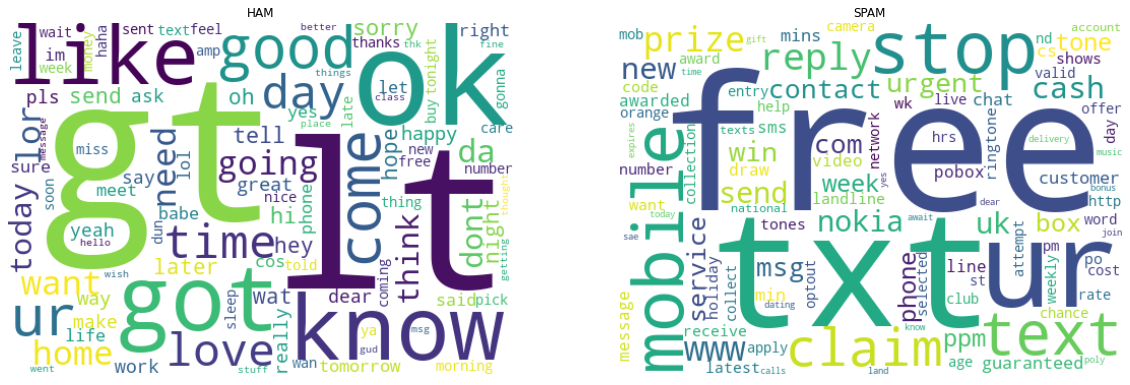

In [48]:
# word count (전체 스팸/ 비스팸 메일의 단순 단어 사용 횟수) 워드클라우드
plt.figure(figsize=(20,10))
wc = WordCloud(background_color='white', max_words=100, width = 500, height = 350)

plt.subplot(1,2,1)
plt.title('HAM')
count_dic = dict(zip(ham['word'], ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud, interpolation = "bilinear")

plt.subplot(1,2,2)
plt.title('SPAM')
count_dic = dict(zip(spam['word'],spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud, interpolation = "bilinear")

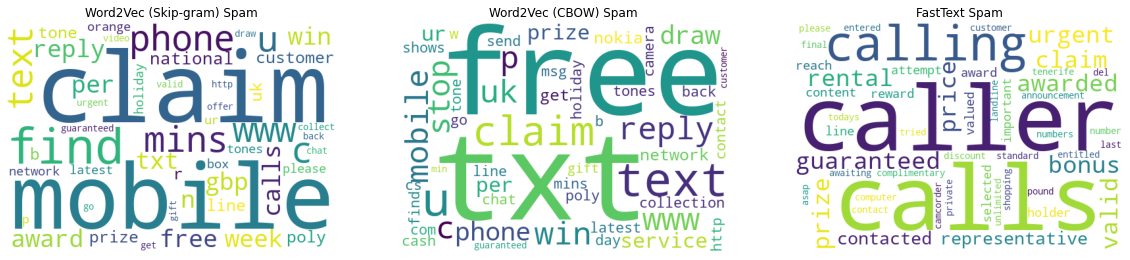

In [49]:
# 스팸 메일의 빈도수가 높은 단어 (free, call) 유사도 기반 워드클라우드
wc = WordCloud(background_color='white', max_words=100, width = 500, height = 350)
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Word2Vec (Skip-gram) Spam')
count_dic = dict(zip([x[0] for x in sg_spam.wv.most_similar(positive=["call"], topn=50)],
                     [x[1] for x in sg_spam.wv.most_similar(positive=["call"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,3,2)
plt.title('Word2Vec (CBOW) Spam ')
count_dic = dict(zip([x[0] for x in cbow_spam.wv.most_similar(positive=["call"], topn=50)],
                     [x[1] for x in cbow_spam.wv.most_similar(positive=["call"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,3,3)
plt.title('FastText Spam')
count_dic = dict(zip([x[0] for x in fasttext_spam.wv.most_similar(positive=["call"], topn=50)],
                     [x[1] for x in fasttext_spam.wv.most_similar(positive=["call"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

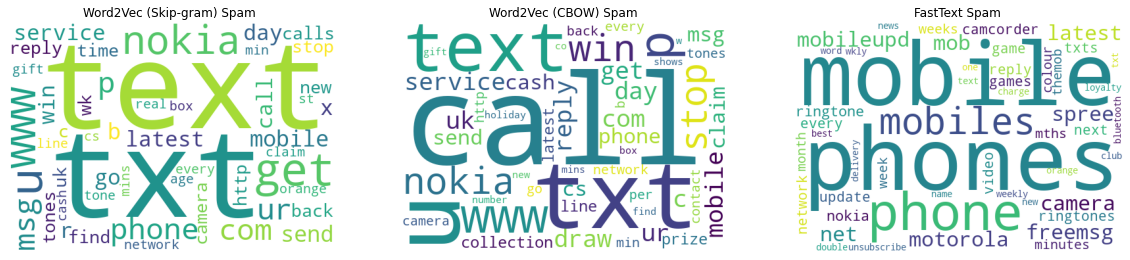

In [50]:
wc = WordCloud(background_color='white', max_words=100, width = 500, height = 350)
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Word2Vec (Skip-gram) Spam ')
count_dic = dict(zip([x[0] for x in sg_spam.wv.most_similar(positive=["free"], topn=50)],
                     [x[1] for x in sg_spam.wv.most_similar(positive=["free"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,3,2)
plt.title('Word2Vec (CBOW) Spam ')
count_dic = dict(zip([x[0] for x in cbow_spam.wv.most_similar(positive=["free"], topn=50)],
                     [x[1] for x in cbow_spam.wv.most_similar(positive=["free"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,3,3)
plt.title('FastText Spam ')
count_dic = dict(zip([x[0] for x in fasttext_spam.wv.most_similar(positive=["free"], topn=50)],
                     [x[1] for x in fasttext_spam.wv.most_similar(positive=["free"], topn=50)]))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

- 휴대폰 변경,카메라와 같은 키워드가 free와 함께 언급되는 것으로 보아 <br>최신 휴대폰으로의 기종 변경과 관련한 스팸 메세지를 예상할 수 있다.
- 무료 즉 free에 관한 언급이 많으며, call과 text 등의 연락을 취하는 단어의 빈도수가 높은 것으로 보아 <br>
해당 스팸 메세지에 대한 회신과 관련한 언급으로 예측할 수 있다.